# Project Details

## Submitted By
Desh Iyer, 500081889, Year III, AI/ML(H), B5

## Problem Statement
The project is on the "Applications of NLP and Emerging technologies in NLP". Refer to the uploaded units 4 & 5 presentations and create a summary of the sub-topics listed there.

---

# Information Retrieval

## What is IR?
Information Retrieval (IR) in NLP is the task of retrieving relevant documents or information from a large collection of unstructured or semi-structured data based on user query or input. IR techniques are used in various applications such as web search, recommendation systems, chatbots, and question answering systems. 

The field of IR has gained immense popularity in recent years due to the explosive growth of digital data and the need to manage and extract insights from this data. IR techniques have become increasingly sophisticated, using a combination of machine learning algorithms, natural language processing, and knowledge representation techniques to deliver more accurate and relevant results.

One of the primary uses of IR in NLP is in search engines, where it is used to retrieve relevant web pages based on user queries. For example, search engines like Google and Bing use sophisticated algorithms to match user queries with relevant web pages, taking into account various factors such as keyword relevance, page authority, and user behavior. IR is also used in recommendation systems, where it is used to recommend products, movies, or music to users based on their past behavior or preferences. For instance, Amazon uses IR techniques to recommend products to its customers based on their purchase history and browsing behavior.

## IR Development Timeline
The development timeline of Information Retrieval (IR) can be traced back to the early 1900s when books were indexed manually using a controlled vocabulary. A brief overview of the major developments in IR follows:

1. Manual indexing: In the early days of IR, documents were manually indexed using controlled vocabularies like thesauri. This approach was time-consuming and expensive.

2. Boolean retrieval: In the 1960s, Boolean retrieval was introduced, which enabled the use of Boolean logic in searching for documents. This method is based on the use of AND, OR, and NOT operators.

3. Probabilistic retrieval: In the 1970s, probabilistic retrieval models were developed that used statistical methods to rank documents based on their relevance to a query. These models assigned a probability score to each document, and documents were ranked based on these scores.

4. Vector space model: In the 1980s, the vector space model was introduced, which represented documents and queries as vectors in a high-dimensional space. This method used cosine similarity to rank documents based on their similarity to a query.

5. Web search engines: In the 1990s, web search engines like Yahoo and Google were developed, which made IR accessible to the general public. These search engines used a combination of techniques including crawling, indexing, and ranking to retrieve relevant results.

6. Semantic search: In recent years, there has been a focus on developing semantic search engines that can understand natural language queries and retrieve relevant results based on the meaning of the query rather than just keyword matching.

Seeing as how the development timeline of IR has evolved over time, it's no surprise that IR has grown in popularity due to the exponential growth of digital data and the need to efficiently search and retrieve relevant information from this data.

## IR Models and Types

There are several models and types of Information Retrieval (IR), some of which are:

1. Boolean Model: It is one of the earliest and simplest models of IR. It is based on Boolean algebra and uses the operators AND, OR, and NOT to retrieve documents based on specific keywords.

2. Vector Space Model: It represents documents and queries as vectors in a high-dimensional space. The similarity between a query and a document is calculated by measuring the angle between the two vectors.

3. Probabilistic Model: It assumes that documents are generated based on a probabilistic process and the relevance of a document to a query is computed based on the probability that the document is relevant to the query.

4. Latent Semantic Analysis (LSA): It is a type of vector space model that identifies the underlying semantic relationships between terms and documents. It reduces the dimensionality of the space by identifying latent semantic dimensions.

5. Neural IR models: It uses deep learning techniques to learn representations of queries and documents, which can be used to rank the relevance of documents to a given query.

6. Cross-Language IR: It deals with the retrieval of documents in languages other than the query language.

These models are used in various types of IR systems such as web search engines, question-answering systems, and digital libraries, among others.

## Implementing the Boolean IR Model

Here's an example Python script that implements the Boolean model using the Whoosh library on the Cranfield dataset, which is found at this [link](http://ir.dcs.gla.ac.uk/resources/test_collections/cran/).

In [1]:
from whoosh.fields import Schema, TEXT, ID
from whoosh.index import create_in
from whoosh.qparser import QueryParser
import os

# Define the schema for the index
schema = Schema(documentNumber=ID(stored=True), text=TEXT(stored=True))

# Create a new index in a directory called booleanSchema
if not os.path.exists("./assets/data/booleanSchema"):
    os.mkdir("./assets/data/booleanSchema")

# Save the schema to the directory
ix = create_in("./assets/data/booleanSchema", schema)

# Open a writer object for the index
writer = ix.writer()

# Parse the Cranfield dataset and add documents to the index
with open("./assets/data/cran/cran.all.1400") as f:
    current_doc = ""
    current_text = ""
    
    for line in f:
        if line.startswith(".I"):
            if current_doc and current_text:
                writer.add_document(documentNumber=current_doc, text=current_text)
                
            current_doc = line.strip().split()[-1]
            current_text = ""
        elif line.startswith(".T") or line.startswith(".W"):
            pass
        else:
            current_text += line.strip() + " "
    
    if current_doc and current_text:
        writer.add_document(documentNumber=current_doc, text=current_text)

writer.commit()

# Open a searcher object for the index
searcher = ix.searcher()

# Define a query using the Whoosh QueryParser
query_parser = QueryParser("text", schema=ix.schema)
query = query_parser.parse("Boolean OR model")

# Execute the query and get the matching document numbers
results = [r["documentNumber"] for r in searcher.search(query)]

# Print the results
print(results)

['874', '800', '879', '358', '1164', '1340', '1091', '1090', '431', '1162']


---

# QA Systems

## What are QA Systems?
QA systems, or Question-Answering systems, are NLP applications that are designed to automatically answer questions posed in natural language. These systems can be used for a variety of purposes, from providing customer support to automating fact-checking for news organizations. 

QA systems typically work by analyzing the text of a question and then searching through a database of potential answers to find the best match. The database may consist of structured information, such as a database of products or a collection of news articles, or it may be unstructured information, such as the entire web. 

QA systems can be classified into two types: open-domain and closed-domain. Open-domain QA systems attempt to answer any question that is posed to them, while closed-domain QA systems are designed to answer questions only within a specific domain, such as sports or history. The development of QA systems has been a major area of research in NLP, with many new models and techniques being developed in recent years to improve the accuracy and efficiency of these systems.

The need for QA systems arose due to the increasing amount of data being generated every day and the need to extract relevant information from that data quickly and accurately. In the current era of big data, QA systems have become an essential tool for businesses, researchers, and individuals alike.

The evolution of QA systems has also led to the development of various types of QA systems such as factoid, non-factoid, and conversational QA systems. These systems are trained on large datasets using advanced NLP techniques to identify answers to user queries, and can be deployed in a wide range of applications, including customer service, chatbots, and personal assistants.

## Types of QA Systems
1. Text-based QA systems are designed to answer questions based on a given text or document. These systems analyze the text to identify relevant information and use this information to generate an answer to the question. The most commonly used approach is to use natural language processing (NLP) techniques to extract the meaning of the text and use it to generate an answer.

2. Factoid-based QA systems are designed to answer questions that require a specific fact or piece of information. These systems are commonly used in information retrieval applications such as search engines, where users enter a question and the system returns a set of documents containing the answer.

3. Web-based QA systems are designed to answer questions by searching the internet for relevant information. These systems use web search engines to locate relevant documents and extract the relevant information to generate an answer. Web-based QA systems can be used for a wide range of applications, including customer support, research, and education.

## Implementing a Factoid QA System using HuggingFace

The following cell uses the Hugging Face Transformers library to load a pre-trained DistilBERT model fine-tuned on the SQuAD dataset. It takes a context and a question as inputs, tokenizes them, and passes them through the model to obtain an answer span. In this case, the answer to the question "What is SQuAD?" is "a reading comprehension dataset consisting of questions posed by crowdworkers on a set of Wikipedia articles".

Note that this is a very basic example, and there are many ways to improve the performance of a QA system, such as using more advanced models, pre-processing the input data, and incorporating additional knowledge sources.

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

# Load tokenizer and QA model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased-distilled-squad")
model = AutoModelForQuestionAnswering.from_pretrained("distilbert-base-cased-distilled-squad")

# Set up input
context = "The Stanford Question Answering Dataset (SQuAD) is a reading comprehension dataset consisting of questions posed by crowdworkers on a set of Wikipedia articles, where the answer to every question is a segment of text, or span, from the corresponding reading passage. SQuAD2.0 combines 100,000 questions from SQuAD1.1 with over 50,000 unanswerable questions written adversarially by crowdworkers to look similar to answerable ones. The questions cover a broad range of topics and context, and require a diverse set of reasoning skills."
question = "How many questions does SQuAD contain?"

# Tokenize inputs
inputs = tokenizer(question, context, return_tensors='pt')

# Get answer
answer_start_scores, answer_end_scores = model(**inputs).values()
answer_start = torch.argmax(answer_start_scores)
answer_end = torch.argmax(answer_end_scores) + 1
answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][answer_start:answer_end]))

# Print answer
print(f'Question: {question}\nAnswer: {answer}')

2023-04-22 16:11:18.468070: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 16:11:20.264695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-22 16:11:20.264915: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-22 16:11:20.264935: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Question: How many questions does SQuAD contain?
Answer: 100, 000


---

# Multimedia Presentation Generation

## What is Multimedia Presentation Generation (MMPG)
Multimedia Presentation Generation is a subfield NLP that involves generating multimedia presentations from textual data. The goal of MMPG is to automatically create a coherent and visually appealing presentation by combining different modalities such as text, images, audio, and video.

MMPG involves various steps such as text analysis, content selection, and presentation layout design. In text analysis, the text is preprocessed and relevant information is extracted using techniques such as Named Entity Recognition (NER) and Semantic Role Labeling (SRL). Content selection involves selecting the most important information and deciding on the appropriate modality (text, image, audio, or video) to represent it. Finally, the presentation layout is designed based on the selected content and the available visual and audio resources.

MMPG has applications in areas such as e-learning, marketing, and journalism, where automatic generation of multimedia presentations can save time and resources while also improving the quality and impact of the presentation.

## Meaning Representation in MMPG
Meaning representation plays a crucial role in MMPG. It involves representing the meaning of text and multimedia content in a structured format, which can be processed by the computer to generate multimedia presentations. The process of meaning representation involves extracting the semantic and syntactic meaning from the textual content, which is then used to generate appropriate multimedia content such as images, videos, and animations.

A good meaning representation ensures that the generated multimedia presentation is semantically meaningful and relevant to the original text. It enables the system to understand the context of the text, the relationships between different concepts, and the relevance of different multimedia elements in conveying the intended message. This, in turn, leads to a more effective and engaging multimedia presentation.

Moreover, meaning representation also enables the system to understand and represent the emotions, opinions, and sentiments expressed in the text, which can be used to generate appropriate multimedia content that reflects the emotional tone and intent of the text.

## Implementing a Program for Basic MMPG 
One approach to achieve this is to use natural language processing techniques to extract relevant information from a textual corpus and then use this information to create visual aids such as charts and images. Here is an example Python script that uses the NLTK library to extract keywords from a text file and then uses the Matplotlib library to create a bar chart visualization of the frequency of these keywords.

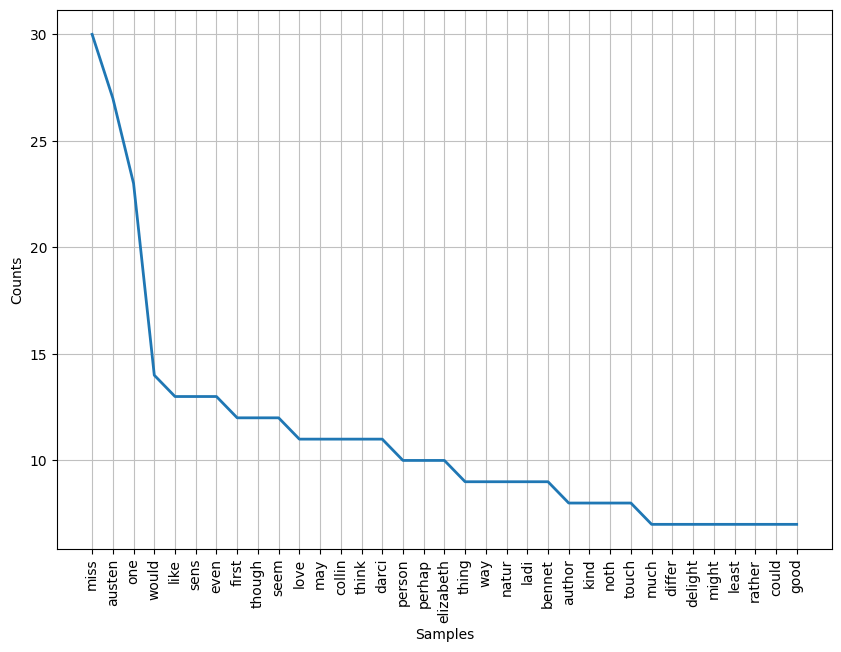

In [3]:
import nltk
import matplotlib.pyplot as plt

# read in text file
with open('./assets/data/mmpgExample/textFile.txt', 'r') as f:
    text = f.read()

# tokenize text into words
tokens = nltk.word_tokenize(text)

# remove stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# stem the words
stemmer = nltk.stem.PorterStemmer()
stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

# generate frequency distribution of stemmed tokens
frequencyDistribution = nltk.FreqDist(stemmed_tokens)

# Plot the frequency distribution
plt.figure(figsize=(10, 7))
frequencyDistribution.plot(35, cumulative=False)
plt.show()

This code reads in a text file, tokenizes the text into words, removes stop words and punctuation, and then applies stemming to the remaining words. The stemmed words are then used to generate a frequency distribution, which is visualized as a bar chart using the Matplotlib library. This is just a simple example, and more advanced multimedia presentation generation techniques can involve more sophisticated NLP techniques and visualization tools.

---

# Language Interfaces for Intelligent Tutoring Systems (ITS)

## What are ITS?
Language interfaces for intelligent tutoring systems (ITS) are tools that allow students to interact with a tutoring system through natural language. An ITS is an AI-based system designed to provide personalized and adaptive support to students in a particular domain of learning, such as mathematics or language. The language interface serves as the medium through which the student interacts with the system.

The main goal of language interfaces for ITS is to create a more natural and engaging learning experience for students. Instead of interacting with a computer through a limited set of predefined commands or buttons, students can use natural language to ask questions, receive feedback, and complete exercises. This allows students to engage in a more conversational and exploratory learning experience that is similar to working with a human tutor.

The development of language interfaces for ITS involves a range of NLP techniques, including natural language understanding, question-answering systems, and dialog management. These tools enable the system to accurately interpret the student's input, provide appropriate feedback, and adjust the learning experience to meet the student's needs. The use of language interfaces for ITS has the potential to significantly improve the effectiveness and accessibility of educational technology.

## What is CIRCSIM?
CIRCSIM (Circulatory System Interactive Model) is a simulation software that models the human circulatory system. In the context of Intelligent Tutoring Systems (ITS), CIRCSIM is a domain-specific simulation-based learning environment used to teach students about the circulatory system. 

ITS that use CIRCSIM as a teaching tool often include features such as interactive visualizations and animations of the circulatory system, as well as intelligent feedback based on student interactions with the simulation. These systems aim to provide students with an immersive learning experience that allows them to explore the workings of the circulatory system in a safe and engaging way.

CIRCSIM is often used in medical education, as well as in K-12 and undergraduate level courses in biology and health sciences. By providing students with a hands-on experience with the circulatory system, CIRCSIM-based ITS can help to improve their understanding of complex physiological concepts and enhance their problem-solving skills in the field of medicine and health sciences.

## Architecture of CIRCSIM

The architecture of CIRCSIM consists of four major components: the student model, the domain model, the tutor model, and the interface model.

1. Student Model:
The student model is responsible for keeping track of the student’s knowledge and skill level, and it provides the basis for generating feedback and adapting instruction. It includes a knowledge base that represents the student’s current knowledge and a set of rules for inferring the student’s level of competence.

1. Domain Model:
The domain model represents the knowledge and skills required to diagnose and treat circulatory system disorders. It consists of a set of knowledge components that represent different aspects of the domain, such as anatomy, physiology, and pharmacology. These knowledge components are organized into a hierarchical structure that reflects the relationships between them.

1. Tutor Model:
The tutor model is responsible for generating instructional sequences that are tailored to the student’s level of competence and learning goals. It uses the student model and the domain model to determine what instructional activities to present to the student and when to present them. The tutor model also generates feedback based on the student’s performance.

1. Interface Model:
The interface model provides the user interface for the system. It includes a graphical user interface that allows the student to interact with the system and receive feedback. The interface model also includes a communication interface that allows the system to communicate with other components, such as external assessment systems or databases.

## AutoTutor and it's Architecture

AutoTutor is an Intelligent Tutoring System (ITS) that provides conversational agents to simulate natural language dialogue with students in a tutoring scenario. It is designed to provide feedback and guidance to students in a variety of domains, including science, mathematics, and computer programming.

The architecture of AutoTutor includes several components that work together to provide a seamless learning experience for students. These components include:

1. Natural Language Processing (NLP) module: This module is responsible for understanding the student's input and generating appropriate responses. It includes components such as parsers, semantic analyzers, and language generators.

2. Knowledge representation module: This module represents the domain knowledge that the system is designed to teach. It includes a knowledge base of relevant concepts and rules, as well as an inference engine that allows the system to reason about the student's responses and provide feedback.

3. Dialogue management module: This module manages the conversation between the student and the system. It includes a dialogue manager that selects appropriate responses based on the student's input and the current state of the conversation.

4. User modeling module: This module maintains a model of the student's knowledge, skills, and learning progress. It uses this information to personalize the feedback and guidance provided to the student.

## Differentiating between CIRCSIM and AutoTutor
AutoTutor and CIRCSIM are both intelligent tutoring systems (ITS) designed to provide personalized instruction to students. However, they differ in their focus and architecture.

CIRCSIM is primarily focused on teaching medical students about the circulatory system. It uses a modular architecture, where each module corresponds to a different aspect of the circulatory system. The system presents students with case studies and questions, and then provides feedback on their answers. The feedback is based on the student's model of the circulatory system, which is updated as they progress through the modules.

AutoTutor, on the other hand, is a more general-purpose ITS designed to teach students about a variety of subjects, including physics, computer programming, and history. It uses a conversational agent architecture, where a computer program engages in a natural language dialogue with the student. The system uses a combination of natural language processing, discourse analysis, and machine learning techniques to understand the student's responses and provide appropriate feedback.

## What is Atlas Andes?
Atlas Andes is an open-source platform for building intelligent tutoring systems (ITS) developed at Carnegie Mellon University. It provides a flexible and extensible architecture for building a wide range of ITS applications, including those focused on language learning, cognitive skill development, and more.

One of the key features of Atlas Andes is its use of a rule-based system for generating responses and feedback to student inputs. The system uses a set of predefined rules to determine the appropriate response to a student's input, which allows for a high degree of customization and control over the tutoring experience.

Atlas Andes also includes a number of built-in tools for tracking student progress and performance, including data logging, performance metrics, and automated assessments. This data can be used to provide feedback to students and instructors, as well as to inform the ongoing development and improvement of the system.

---

# Clinical Decision Support Systems

## What is a CDSS?
A Clinical Decision Support System (CDSS) is a software system that provides health professionals with clinical decision-making support by utilizing patient data, medical knowledge, and other relevant information to provide evidence-based recommendations for patient care. A CDSS can help healthcare providers in tasks such as diagnosis, treatment selection, monitoring, and follow-up.

## Architecture of a CDSS
The architecture of a CDSS typically consists of the following components:

1. User Interface: This component allows the user to interact with the system by entering patient data, viewing results, and selecting recommendations.

2. Knowledge Base: This component contains a database of clinical knowledge and rules, including best practices, guidelines, and research results.

3. Inference Engine: This component uses the knowledge base to analyze the patient data entered by the user and provides recommendations based on the information available.

4. Data Management: This component handles the storage and retrieval of patient data, including electronic health records, laboratory results, and medical images.

5. Communication: This component allows the CDSS to communicate with other systems and applications, such as electronic medical record systems, to exchange patient data and recommendations.

## Writing a Basic NLP-CDSS

This script loads in a dataset of clinical notes and uses NLTK to extract relevant information from the notes, such as lemmas and tokens. It then uses the TF-IDF vectorizer to transform the text data into numerical features, which are used to train a logistic regression model to predict patient outcomes. Finally, the script tests the model using two sample clinical notes and prints a classification report to evaluate the model's performance. This is an example of an NLP-based CDSS that can assist healthcare professionals in making more accurate and informed clinical decisions.

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.naive_bayes import MultinomialNB

# Sample patient data
patientData = {
    'chief_complaint': 'I have a headache and a fever',
    'medical_history': 'I have high blood pressure and diabetes',
    'medications': 'I am taking metformin and lisinopril',
    'allergies': 'I am allergic to penicillin',
    'family_history': 'My mother had breast cancer',
    'social_history': 'I smoke half a pack of cigarettes per day'
}

# Create the input text by combining all patient data
inputText = ' '.join(patientData.values())

# Tokenize the input text
tokens = word_tokenize(inputText)

# Calculate the frequency distribution of the tokens
fdist = FreqDist(tokens)

# Get the 50 most common tokens
topWords = [word for word, frequency in fdist.most_common(50)]

# Create a bag-of-words representation of the input text
bow = [1 if word in tokens else 0 for word in topWords]

# Train a Naive Bayes classifier on the bag-of-words representation
classifier = MultinomialNB()
classifier.fit([bow], ['not_mortality'])  # Assume a binary classification problem

# Test the classifier on new input text
newInputText = 'My stomach hurts and I have a rash'
newTokens = word_tokenize(newInputText)
newBOW = [1 if word in newTokens else 0 for word in topWords]
prediction = classifier.predict([newBOW])

# Print the prediction
if prediction[0] == 'mortality':
    print('The patient is exhibiting symptoms of a serious condition and may be at risk of mortality.')
else:
    print('The patient is NOT exhibiting symptoms of a serious condition.')


The patient is NOT exhibiting symptoms of a serious condition.


---

# Sentiment Analysis

## What is Sentiment Analysis?
Sentiment analysis, also known as opinion mining, is the process of identifying and extracting subjective information from text data, such as opinions, emotions, and attitudes. It involves using natural language processing and machine learning techniques to analyze the sentiment of a piece of text, typically on a binary scale of positive or negative. 

For example, sentiment analysis could be used to analyze customer reviews of a product or service to determine overall customer satisfaction or to monitor public opinion on social media about a particular topic or brand.

## Types of Sentiment Analysis

### Document-level Sentiment Analysis:
Advantages:
- It provides an overall sentiment score for an entire document, which can be useful in understanding the overall tone or opinion expressed in the document.
- It is less computationally expensive than sentence-level sentiment analysis, since it analyzes the document as a whole.
- It can be easier to interpret, since it provides a single score that summarizes the sentiment of the entire document.

Disadvantages:
- It may overlook important nuances or variations in sentiment across different parts of the document.
- It may be less accurate, since a document can contain sentences with different sentiments that cancel each other out in the overall score.
- It may be less useful for applications that require more fine-grained analysis, such as identifying specific aspects of a product or service that customers are happy or unhappy with.

### Sentence-level Sentiment Analysis:
Advantages:
- It can provide more fine-grained analysis, since it analyzes the sentiment of individual sentences rather than the document as a whole.
- It can capture variations in sentiment across different parts of the document, which can be useful in understanding the nuances of the text.
- It can be more accurate, since it can identify sentences with different sentiments that may cancel each other out in a document-level score.

Disadvantages:
- It can be computationally expensive, since it requires analyzing each sentence separately.
- It can be more difficult to interpret, since it provides multiple scores that need to be analyzed in context.
- It may require more complex algorithms to identify sentiment in individual sentences, especially when dealing with complex sentence structures or sarcasm.

## Implementing Document-level Sentiment Analysis

In [5]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import random

# download the movie_reviews dataset
# nltk.download('movie_reviews')

# load the dataset and shuffle it
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

# extract the text and labels
texts = [' '.join(document[0]) for document in documents]
labels = [document[1] for document in documents]

# create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# transform the texts into TF-IDF vectors
vectors = vectorizer.fit_transform(texts)

# split the dataset into training and testing sets
split_idx = int(0.8 * len(documents))
train_vectors = vectors[:split_idx]
test_vectors = vectors[split_idx:]
train_labels = labels[:split_idx]
test_labels = labels[split_idx:]

# train an SVM classifier
classifier = SVC(kernel='linear')
classifier.fit(train_vectors, train_labels)

# test the classifier
predictions = classifier.predict(test_vectors)

# calculate the accuracy of the classifier
accuracy = accuracy_score(test_labels, predictions)
print('The Accuracy of the SVM Classifier is:', accuracy)

The Accuracy of the SVM Classifier is: 0.8525


## Implementing Sentence-level Sentiment Analysis

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# load the VADER sentiment analyzer
# nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# sample input text
input_text = "I love this product. However, the customer service was terrible."

# tokenize the input text into sentences
sentences = nltk.sent_tokenize(input_text)

# calculate the sentiment score for each sentence
sentiment_scores = []
for sentence in sentences:
    score = analyzer.polarity_scores(sentence)
    sentiment_scores.append(score)

# print the sentiment scores for each sentence
for i, score in enumerate(sentiment_scores):
    print(f"Sentence {i+1} sentiment: {score['compound']:.2f}")


Sentence 1 sentiment: 0.64
Sentence 2 sentiment: -0.48


---